In [1]:
from inspect import ClassFoundException
import numpy as np;
from utils.geometry import *
import math
from utils.datatypes import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
 


In [2]:
import options as op

op.MAX_ITER

figure_folder = op.FIGURE_FOLDER

In [3]:

arr = np.zeros(op.MAX_ITER, dtype=dt_vertex)
with open(f'out/general.npy', 'rb') as file1:
    arr = np.load(file1)

arr

array([(0.0001,   1., 100, 150, 50, 1., 14.15811224, False, False, False),
       (0.0002,   2., 100, 150, 50, 1., 14.15485047, False, False, False),
       (0.0003,   3., 100, 150, 50, 1., 14.1516083 , False, False, False),
       (0.0004,   4., 100, 150, 50, 1., 14.14838523, False, False, False),
       (0.0005,   5., 100, 150, 50, 1., 14.1451808 , False, False, False),
       (0.0006,   6., 100, 150, 50, 1., 14.14199455, False, False, False),
       (0.0007,   7., 100, 150, 50, 1., 14.13882606, False, False, False),
       (0.0008,   8., 100, 150, 50, 1., 14.1356749 , False, False, False),
       (0.0009,   9., 100, 150, 50, 1., 14.13254069, False, False, False),
       (0.001 ,  10., 100, 150, 50, 1., 14.12942306, False, False, False),
       (0.0011,  11., 100, 150, 50, 1., 14.12632163, False, False, False),
       (0.0012,  12., 100, 150, 50, 1., 14.12323606, False, False, False),
       (0.0013,  13., 100, 150, 50, 1., 14.12016602, False, False, False),
       (0.0014,  14., 100

In [4]:
df = pd.DataFrame(arr, columns = ['t','iter','n_vertices','n_borders','n_grains','energy','flip','remove','error','total_area'])
df

,t,iter,n_vertices,n_borders,n_grains,energy,flip,remove,error,total_area
0,0.0001,1.0,100,150,50,14.158112,False,False,False,1.0
1,0.0002,2.0,100,150,50,14.154850,False,False,False,1.0
2,0.0003,3.0,100,150,50,14.151608,False,False,False,1.0
3,0.0004,4.0,100,150,50,14.148385,False,False,False,1.0
4,0.0005,5.0,100,150,50,14.145181,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...
96,0.0097,97.0,100,150,50,13.899436,False,False,False,1.0
97,0.0098,98.0,100,150,50,13.897125,False,False,False,1.0
98,0.0099,99.0,100,150,50,13.894820,False,False,False,1.0
99,0.0100,100.0,100,150,50,13.892520,False,False,False,1.0


## AREA OF GRAINS

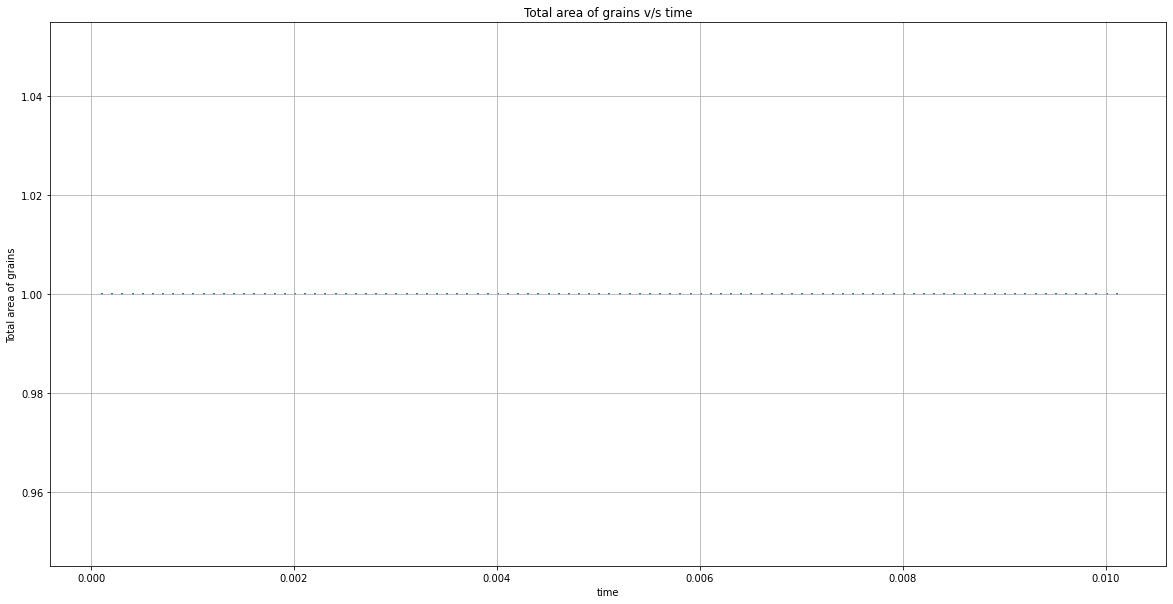

In [5]:
ttile = "Total area of grains v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["total_area"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('Total area of grains')
    #plt.figure(tight_layout=True)
    plt.savefig(f'{figure_folder}/total_area.png', dpi=300)
    plt.show()



## GRAINS

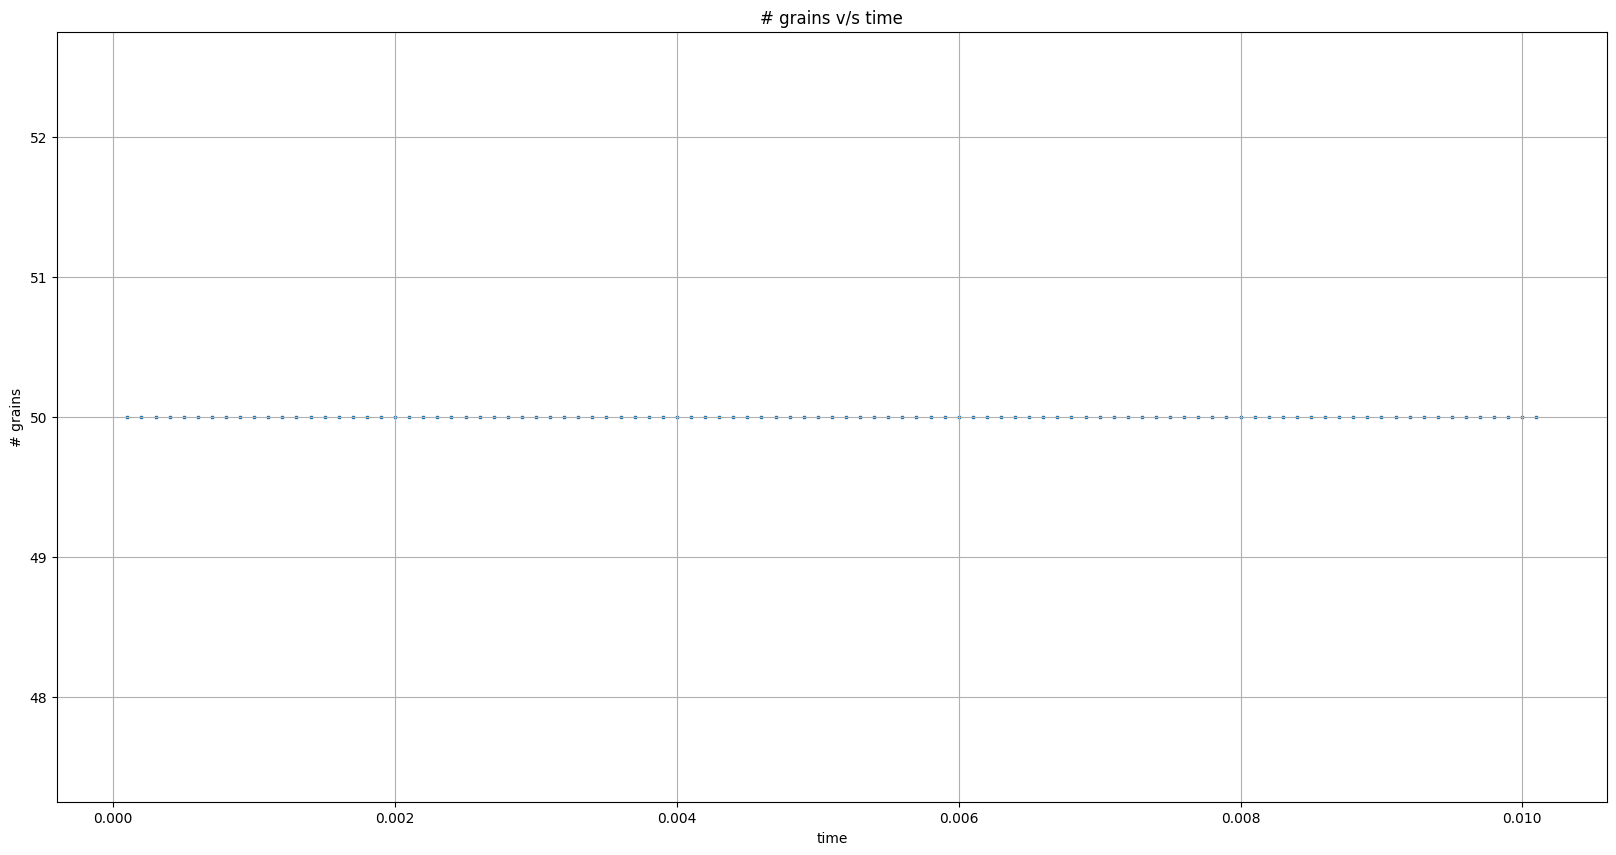

In [6]:
ttile = "# grains v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["n_grains"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('# grains')
    #plt.figure(tight_layout=True)
    plt.savefig(f'{figure_folder}/n_grains.png', dpi=300)
    plt.show()


## VERTICES

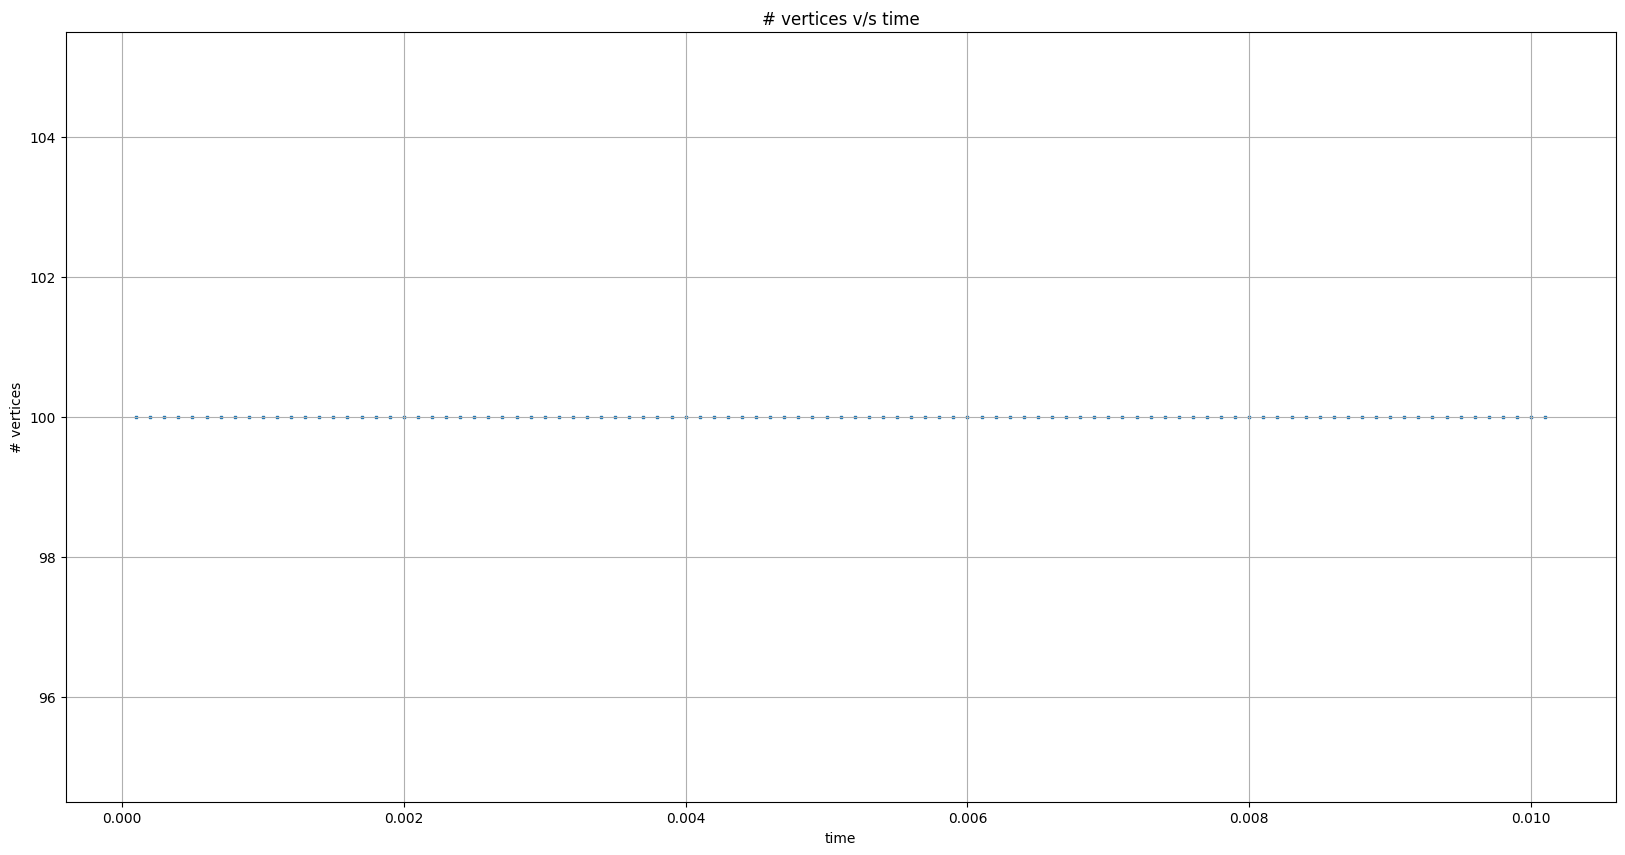

In [7]:
ttile = "# vertices v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["n_vertices"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('# vertices')
    #plt.figure(tight_layout=True)
    plt.savefig(f'{figure_folder}/n_vertices.png', dpi=300, bbox_inches='tight')
    plt.show()

## BORDERS

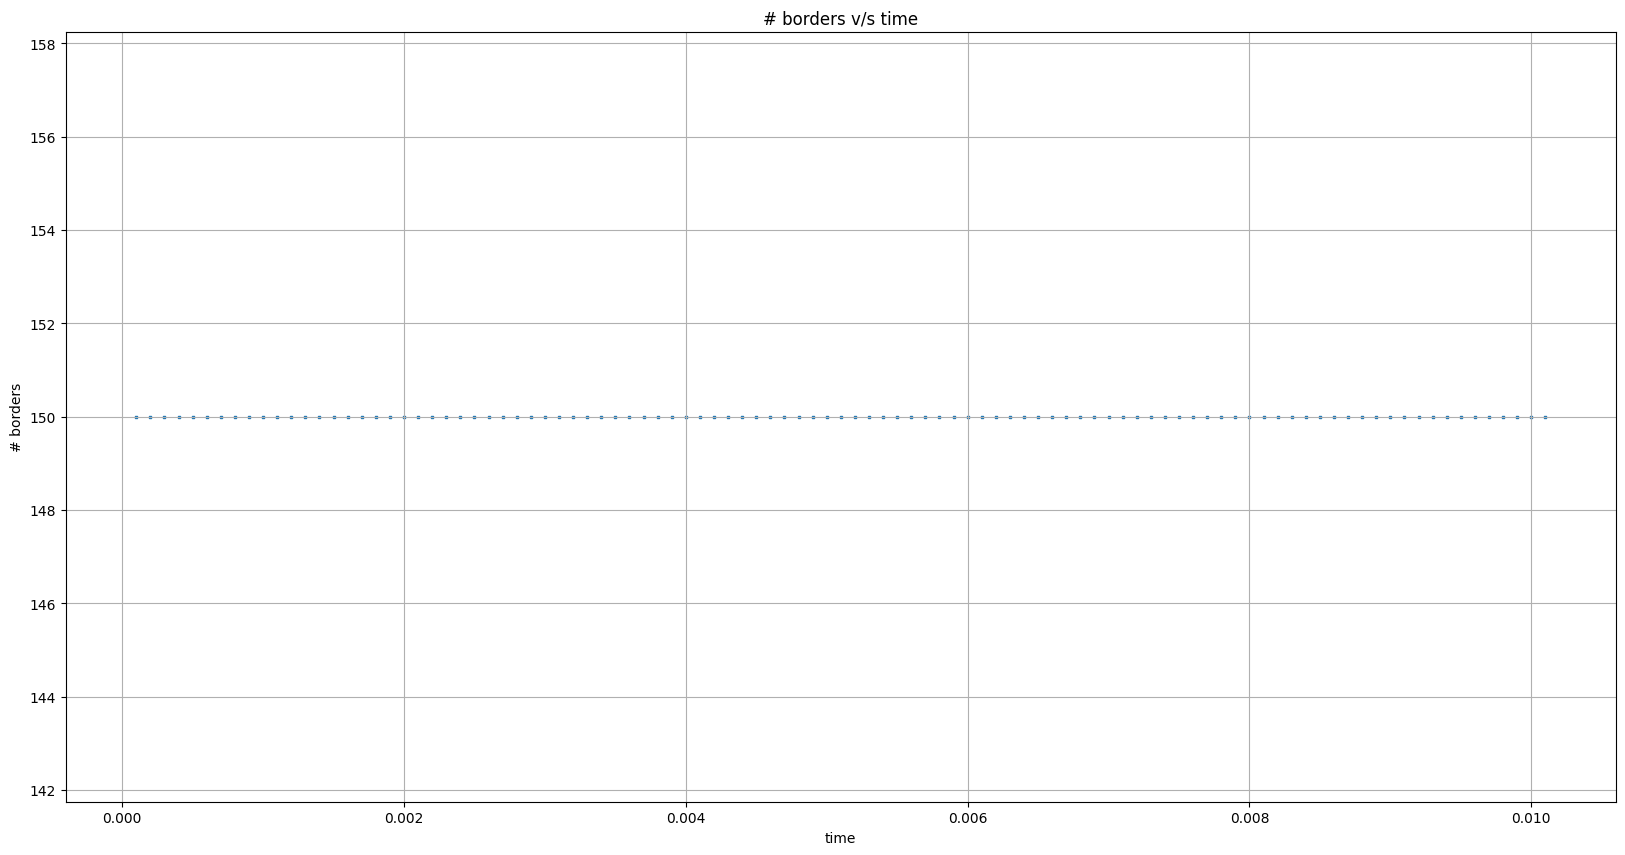

In [8]:

ttile = "# borders v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["n_borders"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('# borders')
    #plt.figure(tight_layout=True)
    plt.savefig(f'{figure_folder}/n_borders.png', dpi=300)
    plt.show()


## GRAINS, VERTICES, BORDERS

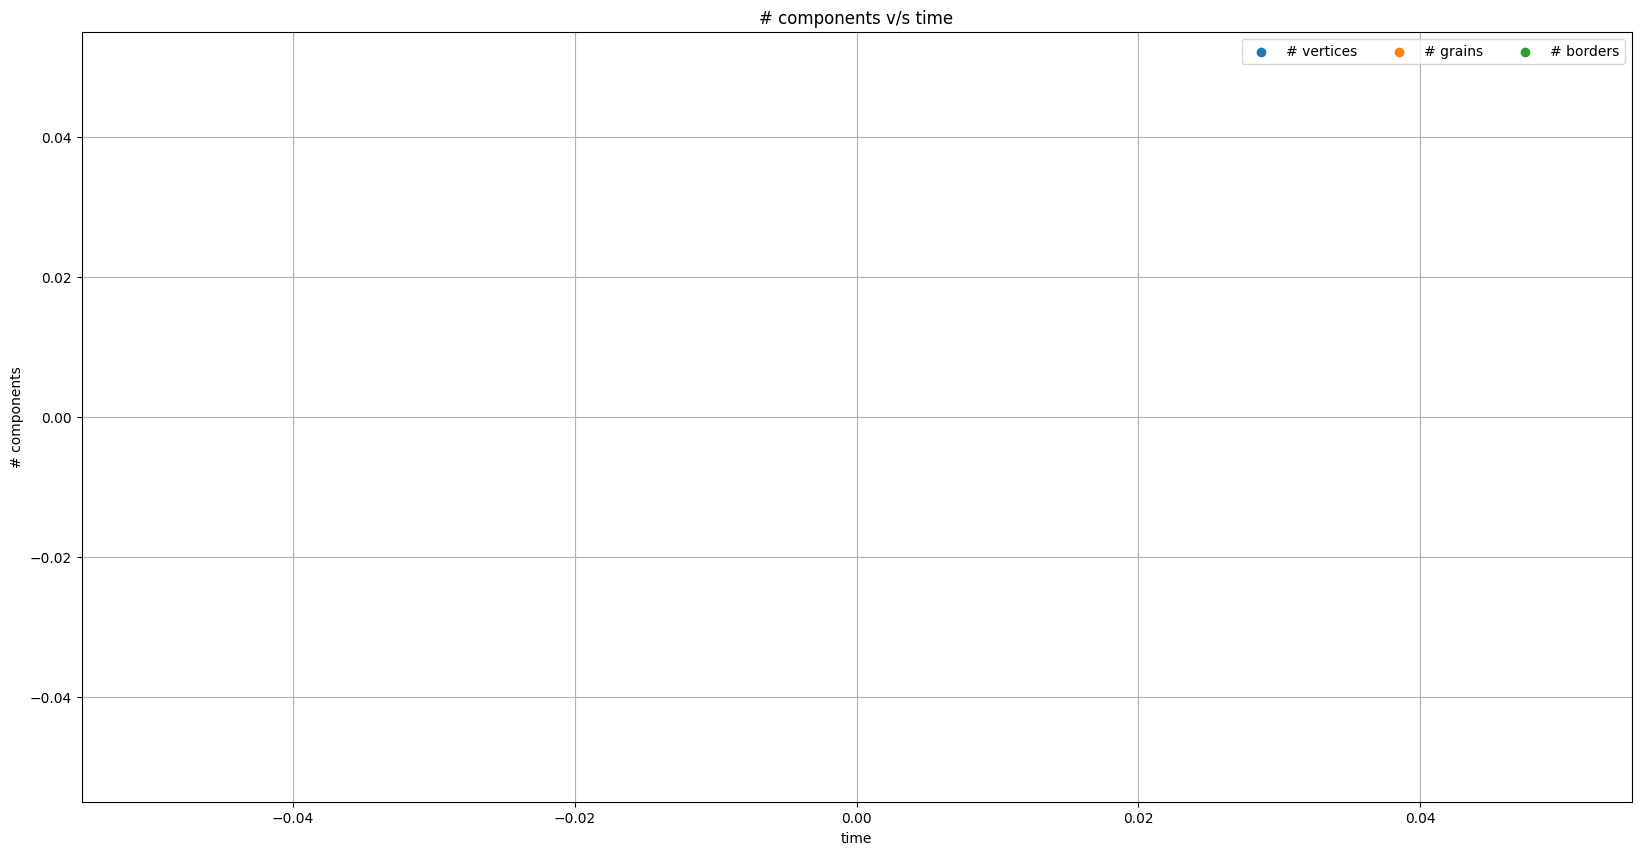

In [9]:

ttile = "# components v/s time"
df_aux = df[ (df.iter % 10 == 0) & (df.iter > 1000) & (df.iter < 2000) ]
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df_aux["t"], df_aux["n_vertices"], marker="o", label="# vertices") # s=10
    plt.scatter(df_aux["t"], df_aux["n_grains"], marker="o", label="# grains")
    plt.scatter(df_aux["t"], df_aux["n_borders"], marker="o", label="# borders")
    plt.legend(ncol=3, loc="upper right")
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('# components')
    plt.savefig(f'{figure_folder}/n_grains_vertices_borders.png', dpi=300)
    #plt.figure(tight_layout=True)
    plt.show()



## ENERGY

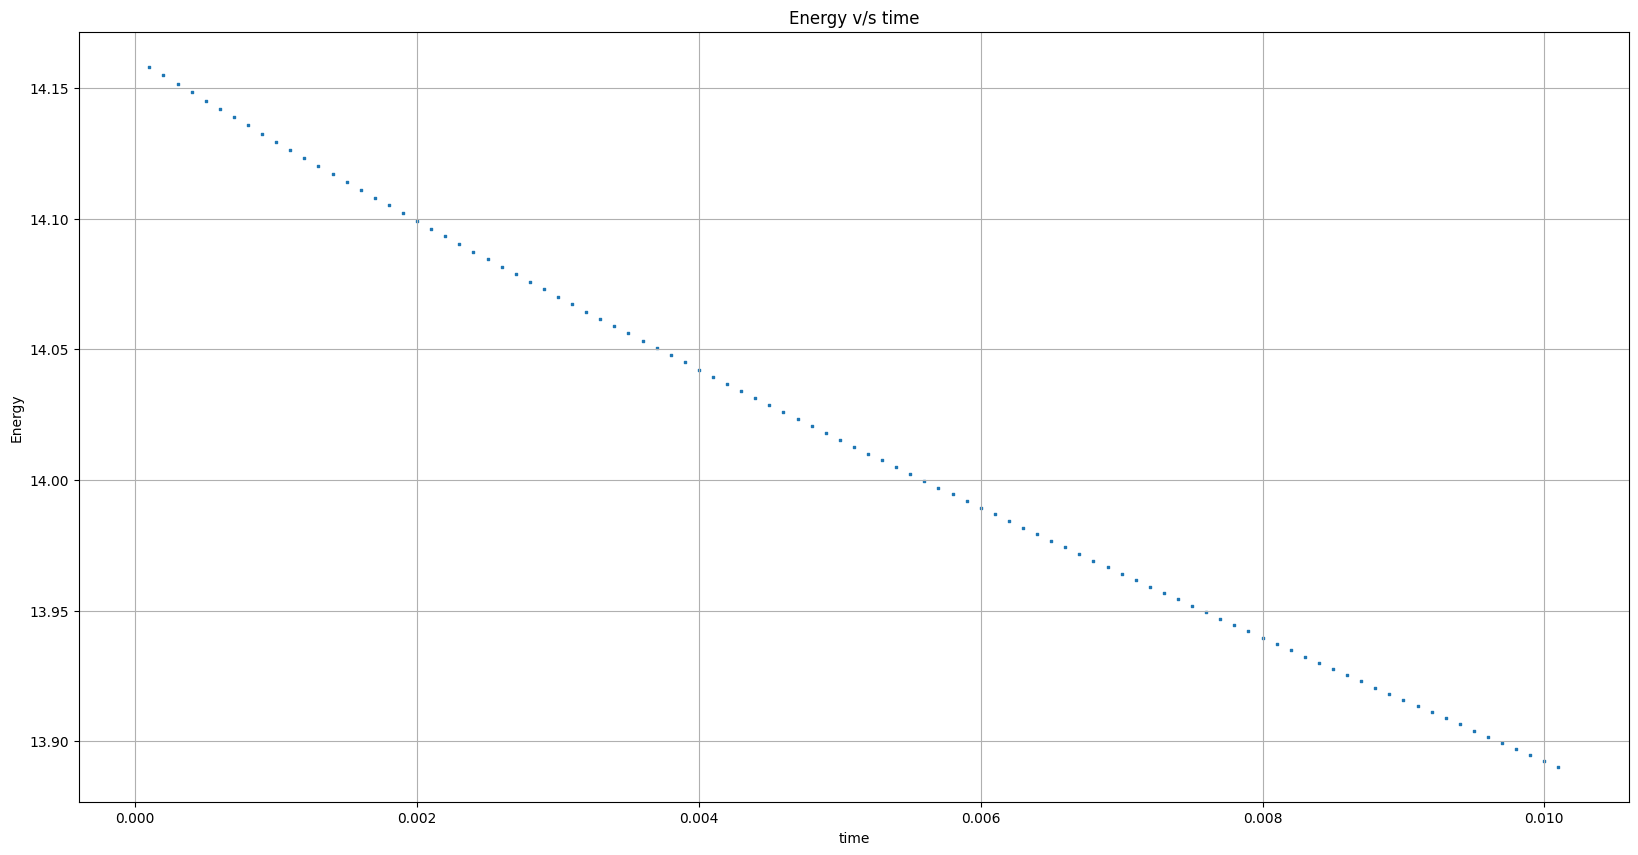

In [10]:

ttile = "Energy v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df["t"], df["energy"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('Energy')
    plt.savefig(f'{figure_folder}/scatter_energy.png', dpi=300)
    #plt.figure(tight_layout=True)
    plt.show()

## ENERGY ZOOM

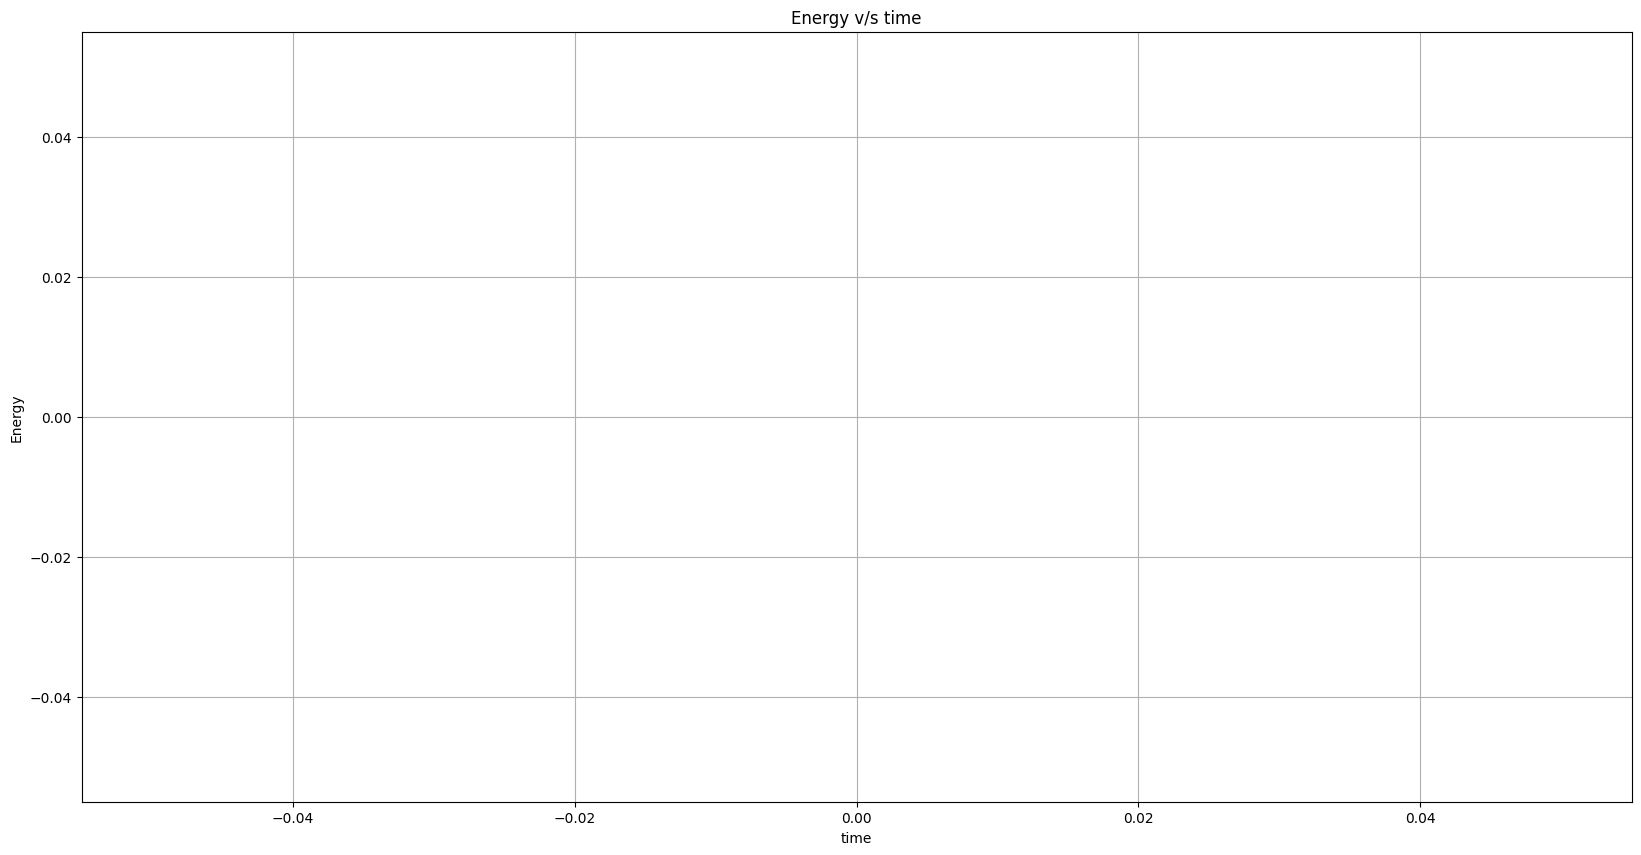

In [11]:

df_aux = df[(df.iter > 800) & (df.iter < 1000)]


ttile = "Energy v/s time"
with plt.rc_context({'axes.edgecolor':'black', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    plt.figure(figsize=(20, 10))
    plt.scatter(df_aux["t"], df_aux["energy"], marker=",", s=1)
    plt.grid()
    plt.title(ttile)
    plt.xlabel('time')
    plt.ylabel('Energy')
    #plt.savefig(f'{figure_folder}/scatter_energy_zoom.png', dpi=300)
    #plt.figure(tight_layout=True)
    plt.show()
